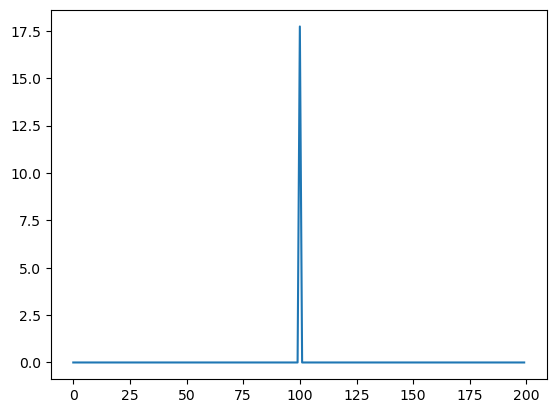

In [1]:
# Constants and Grid Initialization
import numpy as np
import matplotlib.pyplot as plt

# Grid, timestep, and simulation parameters
Nz = 200           # number of spatial steps
Nt = 1000          # number of time steps
dz = 0.01          # spatial step size
dt = dz / (2 * 3e8)  # time step size
Ez = np.zeros(Nz)
Hy = np.zeros(Nz)
source_position = Nz // 2

# Main FDTD Loop
for n in range(Nt):
    # Update magnetic field
    for i in range(Nz - 1):
        Hy[i] = Hy[i] - (dt / dz) * (Ez[i + 1] - Ez[i])
    
    # Update electric field
    for i in range(1, Nz):
        Ez[i] = Ez[i] - (dt / dz) * (Hy[i] - Hy[i - 1])
    
    # Insert source
    Ez[source_position] += np.exp(-(n - 30) ** 2 / 100)
    
    # Apply absorbing boundary conditions
    Ez[0] = Ez[2]
    Ez[-1] = Ez[-3]

# Visualization of results
plt.plot(Ez)
plt.show()
